<a href="https://colab.research.google.com/github/PuneetVerma04/IRIS-Classification-using-Python-Scikit-learn-Tensorflow/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IRIS Classification/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Display basic stats of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Preprocessing Dataset**

In [ ]:
#Check Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

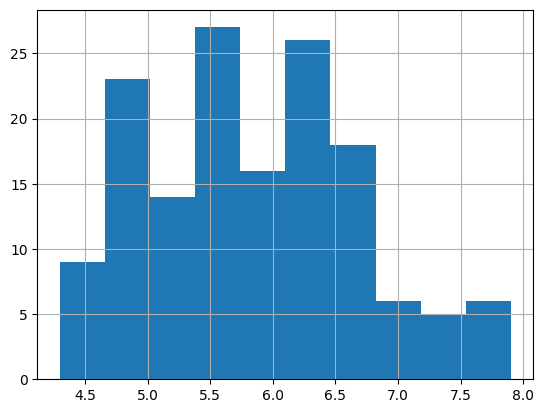

In [ ]:
df['SepalLengthCm'].hist()

<Axes: >

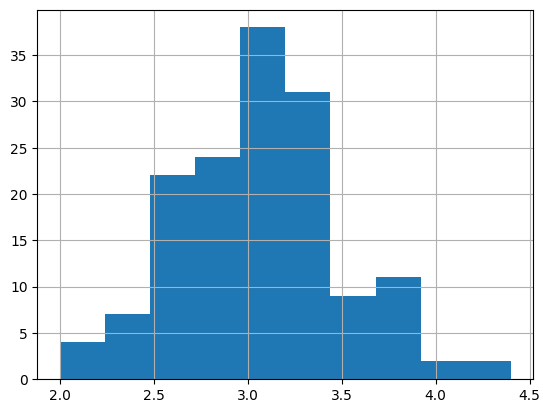

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

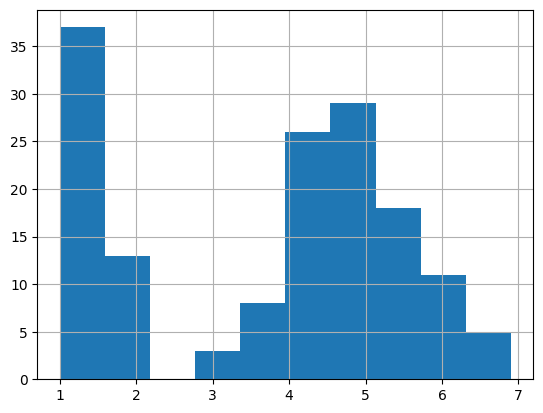

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

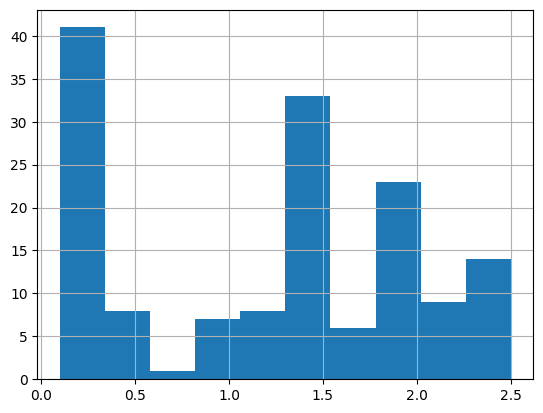

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
x = df.drop(columns=['Id' , 'Species'])
y = df['Species']
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, shuffle=True, random_state=69)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 3s - loss: 1.0504 - accuracy: 0.4381 - 3s/epoch - 844ms/step
Epoch 2/100
4/4 - 0s - loss: 0.9921 - accuracy: 0.4952 - 39ms/epoch - 10ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9561 - accuracy: 0.4762 - 27ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9377 - accuracy: 0.5429 - 60ms/epoch - 15ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8971 - accuracy: 0.6095 - 31ms/epoch - 8ms/step
Epoch 6/100
4/4 - 0s - loss: 0.7954 - accuracy: 0.7524 - 38ms/epoch - 10ms/step
Epoch 7/100
4/4 - 0s - loss: 0.7904 - accuracy: 0.6952 - 35ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7849 - accuracy: 0.7048 - 28ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7473 - accuracy: 0.7429 - 23ms/epoch - 6ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6734 - accuracy: 0.7524 - 37ms/epoch - 9ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7036 - accuracy: 0.7238 - 38ms/epoch - 9ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6747 - accuracy: 0.7429 - 33ms/epoch - 8ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6531 - accurac

In [ ]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 10ms/step
[[9.9990505e-01 6.4327629e-05 3.0570242e-05]
 [8.7395320e-03 9.0919238e-01 8.2068056e-02]
 [9.9948722e-01 3.8693519e-04 1.2572667e-04]
 [1.7232551e-04 1.6584849e-02 9.8324275e-01]
 [9.9928665e-01 5.2416854e-04 1.8911873e-04]]


In [ ]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [ ]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

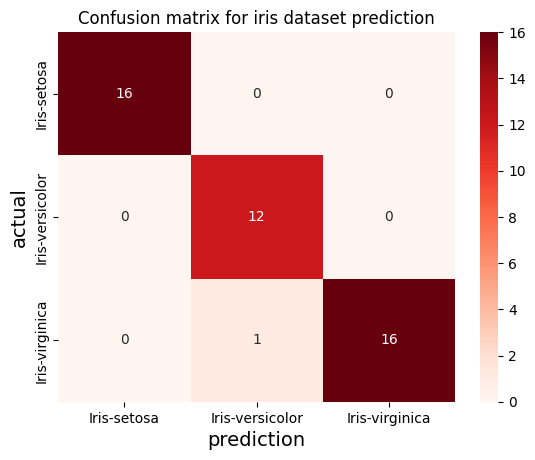

In [ ]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion matrix for iris dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)